## Minimization function

In [1]:
from biorefineries import lipidcane2g as lc
import biosteam as bst
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from biosteam.utils import colors
from math import floor, ceil
from biosteam import plots
from biosteam.utils import CABBI_colors
from thermosteam.units_of_measure import format_units
from biosteam.plots.utils import style_axis, style_plot_limits, fill_plot, set_axes_labels

shadecolor = (*colors.neutral.RGBn, 0.30)
linecolor = (*colors.neutral_shade.RGBn, 0.85)
markercolor = (*colors.CABBI_blue_light.RGBn, 1)
edgecolor = (*colors.CABBI_black.RGBn, 1)

def tickmarks(data, accuracy=50, N_points=5):
    dmin = data.min()
    dmax = data.max()
    dmin = floor(dmin/accuracy) * accuracy
    dmax = ceil(dmax/accuracy) * accuracy
    step = (dmax - dmin) / (N_points - 1)
    if step == 0:
        return [0, 1]
    else:
        return [dmin + step * i for i in range(N_points)]

def create_inflection_plot(ax, name='1g', load=False, save=True):
    
    lipid_retention = np.linspace(0.5, 1.0, 10)
    if load:
        try:
            efficiency_inflection = np.load(f'lipid_extraction_efficiency_inflection{name}.npy')
        except:
            return create_inflection_plot(ax, name, False, save)
    else:
        lc.load(name)
        efficiency_inflection = np.array([
            lc.lipid_extraction_specification.solve_MFPP_inflection(i)
            for i in lipid_retention
        ])
        save and np.save(f'lipid_extraction_efficiency_inflection{name}', efficiency_inflection)
    
    mask = ~np.isnan(efficiency_inflection)
    ax.plot(100 * lipid_retention[mask], 100 * efficiency_inflection[mask], label=str(name))
        

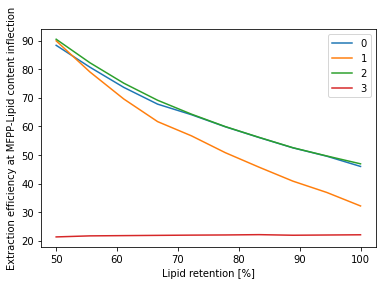

In [4]:
fig, ax = plt.subplots()
create_inflection_plot(ax, 0, load=True)
create_inflection_plot(ax, 1, load=True)
create_inflection_plot(ax, 2, load=True)
create_inflection_plot(ax, 3, load=True)
plt.xlabel('Lipid retention [%]')
plt.ylabel('Extraction efficiency at MFPP-Lipid content inflection')
plt.legend()
plt.show()

In [ ]:
lc.load(0)
lipid_retention = np.linspace(0.5, 1.0, 10)
efficiency_inflection = np.array([
    lc.lipid_extraction_specification.solve_MFPP_inflection(i)
    for i in lipid_retention
])


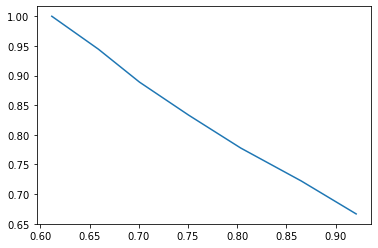

In [6]:
mask

["'np.isnan' is not recognized as an internal or external command,",
 'operable program or batch file.']